In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('yellow_tripdata_2020-01.csv')

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(6405008, 18)

أخذنا عينة لتسهل التعامل معها 

In [4]:
df_sample= df.sample(n = 1000000)

In [5]:
df_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6245249,2.0,2020-01-31 17:50:44,2020-01-31 18:10:17,3.0,2.37,1.0,N,236,229,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,2.5
3981561,1.0,2020-01-21 09:18:58,2020-01-21 09:33:20,2.0,1.10,1.0,N,186,246,2.0,10.0,2.5,0.5,0.00,0.0,0.3,13.30,2.5
4840355,1.0,2020-01-25 01:07:59,2020-01-25 01:08:53,1.0,2.60,5.0,N,119,119,1.0,155.0,0.0,0.0,0.00,0.0,0.3,155.30,0.0
3897979,2.0,2020-01-20 18:52:02,2020-01-20 19:14:33,1.0,8.93,1.0,N,186,243,1.0,27.5,1.0,0.5,6.36,0.0,0.3,38.16,2.5
2125860,2.0,2020-01-12 01:58:03,2020-01-12 02:10:34,1.0,2.04,1.0,N,79,234,1.0,10.0,0.5,0.5,2.76,0.0,0.3,16.56,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722837,1.0,2020-01-10 10:41:10,2020-01-10 10:56:59,1.0,1.50,1.0,N,237,142,1.0,11.0,2.5,0.5,2.85,0.0,0.3,17.15,2.5
36835,1.0,2020-01-01 02:51:23,2020-01-01 02:53:06,4.0,0.50,1.0,N,141,233,2.0,3.5,3.0,0.5,0.00,0.0,0.3,7.30,2.5
1923032,2.0,2020-01-11 05:46:02,2020-01-11 05:53:11,4.0,3.30,1.0,N,141,74,2.0,10.5,0.5,0.5,0.00,0.0,0.3,14.30,2.5
5500017,1.0,2020-01-28 12:50:04,2020-01-28 12:57:14,1.0,1.50,1.0,Y,236,239,2.0,7.0,2.5,0.5,0.00,0.0,0.3,10.30,2.5


In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 6245249 to 4620257
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               989877 non-null   float64
 1   tpep_pickup_datetime   1000000 non-null  object 
 2   tpep_dropoff_datetime  1000000 non-null  object 
 3   passenger_count        989877 non-null   float64
 4   trip_distance          1000000 non-null  float64
 5   RatecodeID             989877 non-null   float64
 6   store_and_fwd_flag     989877 non-null   object 
 7   PULocationID           1000000 non-null  int64  
 8   DOLocationID           1000000 non-null  int64  
 9   payment_type           989877 non-null   float64
 10  fare_amount            1000000 non-null  float64
 11  extra                  1000000 non-null  float64
 12  mta_tax                1000000 non-null  float64
 13  tip_amount             1000000 non-null  float64
 14  tolls_amount

نبدأ نفصل العينة الى قسمين:
1. train 
2. tetst

In [7]:
sample_train, sample_test = train_test_split(df_sample, test_size=0.2,random_state=0)

In [8]:
sample_test.shape

(200000, 18)

نبدأ نفصل [sample_train] الى قسمين:
1. sample_train 
2. sample_val

In [9]:
sample_train, sample_val = train_test_split(sample_train, test_size=0.25,random_state=0)

In [10]:
sample_val.shape

(200000, 18)

هينا أبدأ اشتغل على[sample_train]

In [11]:
sample_train.shape

(600000, 18)

In [12]:
sample_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2547913,1.0,2020-01-14 09:23:42,2020-01-14 09:26:10,1.0,0.90,1.0,N,237,236,1.0,4.5,2.5,0.5,1.17,0.0,0.3,8.97,2.5
189847,2.0,2020-01-02 08:32:46,2020-01-02 08:38:25,5.0,1.22,1.0,N,142,163,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5
3625625,1.0,2020-01-19 05:51:16,2020-01-19 06:00:03,1.0,4.50,1.0,N,50,152,2.0,14.5,3.0,0.5,0.00,0.0,0.3,18.30,2.5
4456183,1.0,2020-01-23 13:41:40,2020-01-23 13:50:19,1.0,1.40,1.0,N,161,246,1.0,8.0,2.5,0.5,2.25,0.0,0.3,13.55,2.5
1457327,2.0,2020-01-09 07:40:38,2020-01-09 07:51:02,2.0,0.79,1.0,N,229,161,1.0,7.5,0.0,0.5,2.16,0.0,0.3,12.96,2.5


In [122]:
sample_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4163225,2.0,2020-01-22 07:51:07,2020-01-22 08:05:54,3.0,1.21,1.0,N,229,170,1.0,10.00,0.00,0.5,2.66,0.0,0.3,15.96,2.5
4930928,2.0,2020-01-25 13:08:39,2020-01-25 13:13:52,1.0,0.66,1.0,N,239,239,1.0,5.50,0.00,0.5,0.00,0.0,0.3,8.80,2.5
6356133,NaN,2020-01-08 09:06:00,2020-01-08 09:56:00,NaN,-8.30,NaN,NaN,35,113,NaN,27.76,2.75,0.5,0.00,0.0,0.3,31.31,0.0
1079133,1.0,2020-01-07 10:20:53,2020-01-07 10:31:19,1.0,1.80,1.0,N,237,238,1.0,9.50,2.50,0.5,2.00,0.0,0.3,14.80,2.5
1073711,2.0,2020-01-07 09:51:31,2020-01-07 09:58:31,1.0,0.97,1.0,N,163,237,1.0,6.50,0.00,0.5,1.47,0.0,0.3,11.27,2.5


In [13]:
sample_train.isnull().sum()

VendorID                 6072
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6072
trip_distance               0
RatecodeID               6072
store_and_fwd_flag       6072
PULocationID                0
DOLocationID                0
payment_type             6072
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [123]:
sample_val.isnull().sum()

VendorID                 2025
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2025
trip_distance               0
RatecodeID               2025
store_and_fwd_flag       2025
PULocationID                0
DOLocationID                0
payment_type             2025
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
dtype: int64

In [14]:
sample_train.dropna(inplace=True)

In [124]:
sample_val.dropna(inplace=True)

In [15]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593928 entries, 2547913 to 2913486
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               593928 non-null  float64
 1   tpep_pickup_datetime   593928 non-null  object 
 2   tpep_dropoff_datetime  593928 non-null  object 
 3   passenger_count        593928 non-null  float64
 4   trip_distance          593928 non-null  float64
 5   RatecodeID             593928 non-null  float64
 6   store_and_fwd_flag     593928 non-null  object 
 7   PULocationID           593928 non-null  int64  
 8   DOLocationID           593928 non-null  int64  
 9   payment_type           593928 non-null  float64
 10  fare_amount            593928 non-null  float64
 11  extra                  593928 non-null  float64
 12  mta_tax                593928 non-null  float64
 13  tip_amount             593928 non-null  float64
 14  tolls_amount           593928

In [125]:
sample_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197975 entries, 4163225 to 489000
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               197975 non-null  float64
 1   tpep_pickup_datetime   197975 non-null  object 
 2   tpep_dropoff_datetime  197975 non-null  object 
 3   passenger_count        197975 non-null  float64
 4   trip_distance          197975 non-null  float64
 5   RatecodeID             197975 non-null  float64
 6   store_and_fwd_flag     197975 non-null  object 
 7   PULocationID           197975 non-null  int64  
 8   DOLocationID           197975 non-null  int64  
 9   payment_type           197975 non-null  float64
 10  fare_amount            197975 non-null  float64
 11  extra                  197975 non-null  float64
 12  mta_tax                197975 non-null  float64
 13  tip_amount             197975 non-null  float64
 14  tolls_amount           197975 

In [16]:
sample_train.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [126]:
sample_val.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

حولنا التواريخ الى نوع تاريخ لنستفيد من مميزاته 

In [17]:
#حولنا النوع الى date
sample_train['tpep_pickup_datetime']=pd.to_datetime(sample_train['tpep_pickup_datetime'])
sample_train['tpep_dropoff_datetime']=pd.to_datetime(sample_train['tpep_dropoff_datetime'])

In [127]:
#حولنا النوع الى date
sample_val['tpep_pickup_datetime']=pd.to_datetime(sample_val['tpep_pickup_datetime'])
sample_val['tpep_dropoff_datetime']=pd.to_datetime(sample_val['tpep_dropoff_datetime'])

In [18]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593928 entries, 2547913 to 2913486
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               593928 non-null  float64       
 1   tpep_pickup_datetime   593928 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  593928 non-null  datetime64[ns]
 3   passenger_count        593928 non-null  float64       
 4   trip_distance          593928 non-null  float64       
 5   RatecodeID             593928 non-null  float64       
 6   store_and_fwd_flag     593928 non-null  object        
 7   PULocationID           593928 non-null  int64         
 8   DOLocationID           593928 non-null  int64         
 9   payment_type           593928 non-null  float64       
 10  fare_amount            593928 non-null  float64       
 11  extra                  593928 non-null  float64       
 12  mta_tax                593928 non-nul

In [128]:
sample_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197975 entries, 4163225 to 489000
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               197975 non-null  float64       
 1   tpep_pickup_datetime   197975 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  197975 non-null  datetime64[ns]
 3   passenger_count        197975 non-null  float64       
 4   trip_distance          197975 non-null  float64       
 5   RatecodeID             197975 non-null  float64       
 6   store_and_fwd_flag     197975 non-null  object        
 7   PULocationID           197975 non-null  int64         
 8   DOLocationID           197975 non-null  int64         
 9   payment_type           197975 non-null  float64       
 10  fare_amount            197975 non-null  float64       
 11  extra                  197975 non-null  float64       
 12  mta_tax                197975 non-null

In [19]:
sample_train['pickup_day_no']=sample_train['tpep_pickup_datetime'].dt.weekday
sample_train['dropoff_day_no']=sample_train['tpep_dropoff_datetime'].dt.weekday

In [129]:
sample_val['pickup_day_no']=sample_val['tpep_pickup_datetime'].dt.weekday
sample_val['dropoff_day_no']=sample_val['tpep_dropoff_datetime'].dt.weekday

In [20]:
sample_train['pickup_hour']=sample_train['tpep_pickup_datetime'].dt.hour
sample_train['dropoff_hour']=sample_train['tpep_dropoff_datetime'].dt.hour

In [130]:
sample_val['pickup_hour']=sample_val['tpep_pickup_datetime'].dt.hour
sample_val['dropoff_hour']=sample_val['tpep_dropoff_datetime'].dt.hour

In [21]:
sample_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
2547913,1.0,2020-01-14 09:23:42,2020-01-14 09:26:10,1.0,0.90,1.0,N,237,236,1.0,...,0.5,1.17,0.0,0.3,8.97,2.5,1,1,9,9
189847,2.0,2020-01-02 08:32:46,2020-01-02 08:38:25,5.0,1.22,1.0,N,142,163,1.0,...,0.5,1.96,0.0,0.3,11.76,2.5,3,3,8,8
3625625,1.0,2020-01-19 05:51:16,2020-01-19 06:00:03,1.0,4.50,1.0,N,50,152,2.0,...,0.5,0.00,0.0,0.3,18.30,2.5,6,6,5,6
4456183,1.0,2020-01-23 13:41:40,2020-01-23 13:50:19,1.0,1.40,1.0,N,161,246,1.0,...,0.5,2.25,0.0,0.3,13.55,2.5,3,3,13,13
1457327,2.0,2020-01-09 07:40:38,2020-01-09 07:51:02,2.0,0.79,1.0,N,229,161,1.0,...,0.5,2.16,0.0,0.3,12.96,2.5,3,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489833,2.0,2020-01-03 21:11:03,2020-01-03 21:28:33,1.0,7.85,1.0,N,229,231,1.0,...,0.5,4.17,0.0,0.3,31.97,2.5,4,4,21,21
4262355,1.0,2020-01-22 15:31:50,2020-01-22 15:36:05,2.0,0.50,1.0,N,230,161,1.0,...,0.5,1.55,0.0,0.3,9.35,2.5,2,2,15,15
5295282,1.0,2020-01-27 11:29:40,2020-01-27 11:39:47,0.0,0.90,1.0,N,170,100,1.0,...,0.5,2.15,0.0,0.3,12.95,2.5,0,0,11,11
3109467,1.0,2020-01-16 19:01:13,2020-01-16 19:20:04,1.0,2.10,1.0,N,186,233,1.0,...,0.5,3.45,0.0,0.3,20.75,2.5,3,3,19,19


In [131]:
sample_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
4163225,2.0,2020-01-22 07:51:07,2020-01-22 08:05:54,3.0,1.21,1.0,N,229,170,1.0,...,0.5,2.66,0.0,0.3,15.96,2.5,2,2,7,8
4930928,2.0,2020-01-25 13:08:39,2020-01-25 13:13:52,1.0,0.66,1.0,N,239,239,1.0,...,0.5,0.00,0.0,0.3,8.80,2.5,5,5,13,13
1079133,1.0,2020-01-07 10:20:53,2020-01-07 10:31:19,1.0,1.80,1.0,N,237,238,1.0,...,0.5,2.00,0.0,0.3,14.80,2.5,1,1,10,10
1073711,2.0,2020-01-07 09:51:31,2020-01-07 09:58:31,1.0,0.97,1.0,N,163,237,1.0,...,0.5,1.47,0.0,0.3,11.27,2.5,1,1,9,9
5637264,2.0,2020-01-28 23:22:25,2020-01-28 23:47:52,1.0,6.37,1.0,N,158,61,1.0,...,0.5,5.00,0.0,0.3,32.30,2.5,1,1,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234035,2.0,2020-01-08 03:20:18,2020-01-08 03:34:19,1.0,3.80,1.0,N,164,231,1.0,...,0.5,3.46,0.0,0.3,20.76,2.5,2,2,3,3
5506865,2.0,2020-01-28 13:01:48,2020-01-28 13:15:23,6.0,1.48,1.0,N,161,237,1.0,...,0.5,2.00,0.0,0.3,15.30,2.5,1,1,13,13
5230348,1.0,2020-01-26 22:40:29,2020-01-26 22:49:36,1.0,2.70,1.0,N,148,80,1.0,...,0.5,1.00,0.0,0.3,15.80,2.5,6,6,22,22
2754686,2.0,2020-01-15 09:35:54,2020-01-15 09:46:29,4.0,1.54,1.0,N,144,234,1.0,...,0.5,1.18,0.0,0.3,12.98,2.5,2,2,9,9


In [22]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [23]:
sample_train['pickup_timeofday']=sample_train['pickup_hour'].apply(time_of_day)
sample_train['dropoff_timeofday']=sample_train['dropoff_hour'].apply(time_of_day)

In [132]:
sample_val['pickup_timeofday']=sample_val['pickup_hour'].apply(time_of_day)
sample_val['dropoff_timeofday']=sample_val['dropoff_hour'].apply(time_of_day)

In [24]:
sample_train.drop('tpep_pickup_datetime', axis=1, inplace=True)
sample_train.drop('tpep_dropoff_datetime', axis=1, inplace=True)

In [133]:
sample_val.drop('tpep_pickup_datetime', axis=1, inplace=True)
sample_val.drop('tpep_dropoff_datetime', axis=1, inplace=True)

In [25]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
2547913,1.0,1.0,0.90,1.0,N,237,236,1.0,4.5,2.5,...,0.0,0.3,8.97,2.5,1,1,9,9,Morning,Morning
189847,2.0,5.0,1.22,1.0,N,142,163,1.0,6.5,0.0,...,0.0,0.3,11.76,2.5,3,3,8,8,Morning,Morning
3625625,1.0,1.0,4.50,1.0,N,50,152,2.0,14.5,3.0,...,0.0,0.3,18.30,2.5,6,6,5,6,Late night,Morning
4456183,1.0,1.0,1.40,1.0,N,161,246,1.0,8.0,2.5,...,0.0,0.3,13.55,2.5,3,3,13,13,Afternoon,Afternoon
1457327,2.0,2.0,0.79,1.0,N,229,161,1.0,7.5,0.0,...,0.0,0.3,12.96,2.5,3,3,7,7,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489833,2.0,1.0,7.85,1.0,N,229,231,1.0,24.0,0.5,...,0.0,0.3,31.97,2.5,4,4,21,21,Evening,Evening
4262355,1.0,2.0,0.50,1.0,N,230,161,1.0,4.5,2.5,...,0.0,0.3,9.35,2.5,2,2,15,15,Afternoon,Afternoon
5295282,1.0,0.0,0.90,1.0,N,170,100,1.0,7.5,2.5,...,0.0,0.3,12.95,2.5,0,0,11,11,Morning,Morning
3109467,1.0,1.0,2.10,1.0,N,186,233,1.0,13.0,3.5,...,0.0,0.3,20.75,2.5,3,3,19,19,Evening,Evening


In [134]:
sample_val

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
4163225,2.0,3.0,1.21,1.0,N,229,170,1.0,10.0,0.0,...,0.0,0.3,15.96,2.5,2,2,7,8,Morning,Morning
4930928,2.0,1.0,0.66,1.0,N,239,239,1.0,5.5,0.0,...,0.0,0.3,8.80,2.5,5,5,13,13,Afternoon,Afternoon
1079133,1.0,1.0,1.80,1.0,N,237,238,1.0,9.5,2.5,...,0.0,0.3,14.80,2.5,1,1,10,10,Morning,Morning
1073711,2.0,1.0,0.97,1.0,N,163,237,1.0,6.5,0.0,...,0.0,0.3,11.27,2.5,1,1,9,9,Morning,Morning
5637264,2.0,1.0,6.37,1.0,N,158,61,1.0,23.5,0.5,...,0.0,0.3,32.30,2.5,1,1,23,23,Late night,Late night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234035,2.0,1.0,3.80,1.0,N,164,231,1.0,13.5,0.5,...,0.0,0.3,20.76,2.5,2,2,3,3,Late night,Late night
5506865,2.0,6.0,1.48,1.0,N,161,237,1.0,10.0,0.0,...,0.0,0.3,15.30,2.5,1,1,13,13,Afternoon,Afternoon
5230348,1.0,1.0,2.70,1.0,N,148,80,1.0,11.0,3.0,...,0.0,0.3,15.80,2.5,6,6,22,22,Late night,Late night
2754686,2.0,4.0,1.54,1.0,N,144,234,1.0,8.5,0.0,...,0.0,0.3,12.98,2.5,2,2,9,9,Morning,Morning


In [26]:
sample_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593928 entries, 2547913 to 2913486
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               593928 non-null  float64
 1   passenger_count        593928 non-null  float64
 2   trip_distance          593928 non-null  float64
 3   RatecodeID             593928 non-null  float64
 4   store_and_fwd_flag     593928 non-null  object 
 5   PULocationID           593928 non-null  int64  
 6   DOLocationID           593928 non-null  int64  
 7   payment_type           593928 non-null  float64
 8   fare_amount            593928 non-null  float64
 9   extra                  593928 non-null  float64
 10  mta_tax                593928 non-null  float64
 11  tip_amount             593928 non-null  float64
 12  tolls_amount           593928 non-null  float64
 13  improvement_surcharge  593928 non-null  float64
 14  total_amount           593928

In [135]:
sample_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197975 entries, 4163225 to 489000
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               197975 non-null  float64
 1   passenger_count        197975 non-null  float64
 2   trip_distance          197975 non-null  float64
 3   RatecodeID             197975 non-null  float64
 4   store_and_fwd_flag     197975 non-null  object 
 5   PULocationID           197975 non-null  int64  
 6   DOLocationID           197975 non-null  int64  
 7   payment_type           197975 non-null  float64
 8   fare_amount            197975 non-null  float64
 9   extra                  197975 non-null  float64
 10  mta_tax                197975 non-null  float64
 11  tip_amount             197975 non-null  float64
 12  tolls_amount           197975 non-null  float64
 13  improvement_surcharge  197975 non-null  float64
 14  total_amount           197975 

In [27]:
sample_train.nunique()

VendorID                    2
passenger_count             8
trip_distance            3028
RatecodeID                  7
store_and_fwd_flag          2
PULocationID              241
DOLocationID              259
payment_type                4
fare_amount               818
extra                      20
mta_tax                     4
tip_amount               1954
tolls_amount              296
improvement_surcharge       3
total_amount             5373
congestion_surcharge        5
pickup_day_no               7
dropoff_day_no              7
pickup_hour                24
dropoff_hour               24
pickup_timeofday            4
dropoff_timeofday           4
dtype: int64

In [136]:
sample_val.nunique()

VendorID                    2
passenger_count             9
trip_distance            2569
RatecodeID                  6
store_and_fwd_flag          2
PULocationID              231
DOLocationID              253
payment_type                4
fare_amount               527
extra                      21
mta_tax                     5
tip_amount               1472
tolls_amount              184
improvement_surcharge       3
total_amount             3537
congestion_surcharge        4
pickup_day_no               7
dropoff_day_no              7
pickup_hour                24
dropoff_hour               24
pickup_timeofday            4
dropoff_timeofday           4
dtype: int64

In [28]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000,593928.000000
mean,1.669233,1.511953,2.843922,1.060507,165.075317,162.995254,1.270853,12.484762,1.099655,0.494022,2.208279,0.335609,0.298054,18.462546,2.300690,2.992285,2.995326,13.925944,13.987281
std,0.470490,1.147591,3.754745,0.833300,65.373729,69.775886,0.473941,11.742751,1.259388,0.066238,2.683452,1.592361,0.033209,14.424894,0.698033,1.851879,1.854231,5.879237,5.948668
min,1.000000,0.000000,-22.180000,1.000000,1.000000,1.000000,1.000000,-214.000000,-4.500000,-0.500000,-7.560000,-30.000000,-0.300000,-214.300000,-2.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.960000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.160000,2.500000,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.950000,0.000000,0.300000,14.160000,2.500000,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.880000,1.000000,234.000000,234.000000,2.000000,13.500000,2.500000,0.500000,2.860000,0.000000,0.300000,19.560000,2.500000,4.000000,4.000000,19.000000,19.000000
max,2.000000,9.000000,92.060000,99.000000,265.000000,265.000000,4.000000,480.000000,113.010000,3.300000,300.880000,149.000000,0.300000,498.660000,2.750000,6.000000,6.000000,23.000000,23.000000


In [29]:
sample_train[sample_train['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
3880184,1.0,0.0,0.6,1.0,N,237,229,1.0,5.0,2.5,...,0.00,0.3,9.30,2.5,0,0,17,17,Evening,Evening
4782578,1.0,0.0,0.7,1.0,N,142,143,1.0,5.0,3.0,...,0.00,0.3,10.00,2.5,4,4,20,20,Evening,Evening
6306784,1.0,0.0,1.5,1.0,N,162,100,1.0,13.5,3.0,...,0.00,0.3,20.76,2.5,4,4,21,21,Evening,Evening
3472738,1.0,0.0,0.7,1.0,N,158,68,1.0,5.0,2.5,...,0.00,0.3,9.95,2.5,5,5,12,12,Afternoon,Afternoon
2035226,1.0,0.0,2.0,1.0,N,74,166,1.0,13.5,1.0,...,0.00,0.3,18.35,0.0,5,5,18,18,Evening,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093403,1.0,0.0,10.0,1.0,N,264,138,3.0,28.0,2.5,...,6.12,0.3,37.42,2.5,6,6,8,8,Morning,Morning
5612668,1.0,0.0,1.9,1.0,Y,107,162,1.0,8.0,3.0,...,0.00,0.3,12.80,2.5,1,1,21,22,Evening,Late night
5696795,1.0,0.0,8.9,1.0,N,233,138,2.0,26.0,2.5,...,6.12,0.3,35.42,2.5,2,2,10,10,Morning,Morning
2043641,1.0,0.0,6.7,1.0,N,114,166,1.0,30.0,2.5,...,0.00,0.3,39.95,2.5,5,5,18,19,Evening,Evening


In [137]:
sample_val[sample_val['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
6128513,1.0,0.0,1.5,1.0,N,24,43,1.0,8.0,0.0,...,0.0,0.3,10.56,0.0,4,4,7,7,Morning,Morning
2744398,1.0,0.0,0.6,1.0,N,237,237,1.0,5.5,2.5,...,0.0,0.3,17.60,2.5,2,2,8,8,Morning,Morning
5905863,1.0,0.0,1.2,1.0,N,90,246,1.0,6.5,2.5,...,0.0,0.3,11.75,2.5,3,3,9,9,Morning,Morning
1971167,1.0,0.0,0.6,1.0,N,263,236,1.0,5.5,2.5,...,0.0,0.3,11.00,2.5,5,5,12,12,Afternoon,Afternoon
5417294,1.0,0.0,2.9,1.0,N,262,137,1.0,10.5,3.0,...,0.0,0.3,15.30,2.5,0,0,22,22,Late night,Late night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815983,1.0,0.0,1.8,1.0,N,137,43,1.0,7.5,2.5,...,0.0,0.3,12.95,2.5,6,6,18,18,Evening,Evening
440438,1.0,0.0,1.7,1.0,N,43,142,2.0,9.5,3.5,...,0.0,0.3,13.80,2.5,4,4,17,17,Evening,Evening
1215900,1.0,0.0,1.4,1.0,N,230,246,2.0,7.5,3.0,...,0.0,0.3,11.30,2.5,1,1,22,22,Late night,Late night
3232740,1.0,0.0,1.7,1.0,N,246,162,1.0,16.0,2.5,...,0.0,0.3,23.15,2.5,4,4,10,11,Morning,Morning


مسحنا كل صف كان عدد الركاب فيه ٠ 

In [30]:
sample_train = sample_train[sample_train['passenger_count'] >0]

In [138]:
sample_val =sample_val[sample_val['passenger_count'] >0]

In [31]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
2547913,1.0,1.0,0.90,1.0,N,237,236,1.0,4.5,2.5,...,0.0,0.3,8.97,2.5,1,1,9,9,Morning,Morning
189847,2.0,5.0,1.22,1.0,N,142,163,1.0,6.5,0.0,...,0.0,0.3,11.76,2.5,3,3,8,8,Morning,Morning
3625625,1.0,1.0,4.50,1.0,N,50,152,2.0,14.5,3.0,...,0.0,0.3,18.30,2.5,6,6,5,6,Late night,Morning
4456183,1.0,1.0,1.40,1.0,N,161,246,1.0,8.0,2.5,...,0.0,0.3,13.55,2.5,3,3,13,13,Afternoon,Afternoon
1457327,2.0,2.0,0.79,1.0,N,229,161,1.0,7.5,0.0,...,0.0,0.3,12.96,2.5,3,3,7,7,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446678,1.0,1.0,1.90,1.0,N,237,75,1.0,9.0,2.5,...,0.0,0.3,14.15,2.5,1,1,7,7,Morning,Morning
489833,2.0,1.0,7.85,1.0,N,229,231,1.0,24.0,0.5,...,0.0,0.3,31.97,2.5,4,4,21,21,Evening,Evening
4262355,1.0,2.0,0.50,1.0,N,230,161,1.0,4.5,2.5,...,0.0,0.3,9.35,2.5,2,2,15,15,Afternoon,Afternoon
3109467,1.0,1.0,2.10,1.0,N,186,233,1.0,13.0,3.5,...,0.0,0.3,20.75,2.5,3,3,19,19,Evening,Evening


In [32]:
sample_train[sample_train['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday


In [139]:
sample_val[sample_val['passenger_count'] == 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday


In [33]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000,583237.000000
mean,1.681392,1.539667,2.846354,1.059130,165.073454,162.999597,1.270448,12.488607,1.071776,0.493988,2.209587,0.335942,0.298025,18.468251,2.301032,2.993238,2.996274,13.925478,13.986494
std,0.465937,1.139489,3.755184,0.767083,65.390134,69.783789,0.473009,11.739528,1.248235,0.066549,2.684114,1.593437,0.033473,14.423567,0.697880,1.851980,1.854342,5.883310,5.952772
min,1.000000,1.000000,-22.180000,1.000000,1.000000,1.000000,1.000000,-214.000000,-4.500000,-0.500000,-7.560000,-30.000000,-0.300000,-214.300000,-2.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.960000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.160000,2.500000,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.950000,0.000000,0.300000,14.160000,2.500000,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.890000,1.000000,234.000000,234.000000,2.000000,13.500000,2.500000,0.500000,2.860000,0.000000,0.300000,19.560000,2.500000,4.000000,4.000000,19.000000,19.000000
max,2.000000,9.000000,92.060000,99.000000,265.000000,265.000000,4.000000,480.000000,113.010000,3.300000,300.880000,149.000000,0.300000,498.660000,2.750000,6.000000,6.000000,23.000000,23.000000


In [34]:
sample_train[sample_train['passenger_count'] == 9]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
792649,2.0,9.0,0.0,5.0,N,162,162,1.0,90.00,0.0,...,0.0,0.3,90.80,0.0,6,6,15,15,Afternoon,Afternoon
6174386,2.0,9.0,0.0,5.0,N,1,264,1.0,95.15,0.0,...,0.0,0.3,105.95,0.0,4,4,11,11,Morning,Morning
535234,2.0,9.0,0.0,5.0,N,1,1,1.0,95.00,0.0,...,0.0,0.3,95.80,0.0,5,5,7,7,Morning,Morning
1807403,2.0,9.0,0.0,5.0,N,1,1,1.0,95.00,0.0,...,0.0,0.3,95.30,0.0,4,4,17,17,Evening,Evening


نحذف القيمة لأنها وحده فقط 

In [35]:
sample_train = sample_train[sample_train['passenger_count'] < 9]

In [140]:
sample_val = sample_val[sample_val['passenger_count'] < 9]

In [36]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
2547913,1.0,1.0,0.90,1.0,N,237,236,1.0,4.5,2.5,...,0.0,0.3,8.97,2.5,1,1,9,9,Morning,Morning
189847,2.0,5.0,1.22,1.0,N,142,163,1.0,6.5,0.0,...,0.0,0.3,11.76,2.5,3,3,8,8,Morning,Morning
3625625,1.0,1.0,4.50,1.0,N,50,152,2.0,14.5,3.0,...,0.0,0.3,18.30,2.5,6,6,5,6,Late night,Morning
4456183,1.0,1.0,1.40,1.0,N,161,246,1.0,8.0,2.5,...,0.0,0.3,13.55,2.5,3,3,13,13,Afternoon,Afternoon
1457327,2.0,2.0,0.79,1.0,N,229,161,1.0,7.5,0.0,...,0.0,0.3,12.96,2.5,3,3,7,7,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446678,1.0,1.0,1.90,1.0,N,237,75,1.0,9.0,2.5,...,0.0,0.3,14.15,2.5,1,1,7,7,Morning,Morning
489833,2.0,1.0,7.85,1.0,N,229,231,1.0,24.0,0.5,...,0.0,0.3,31.97,2.5,4,4,21,21,Evening,Evening
4262355,1.0,2.0,0.50,1.0,N,230,161,1.0,4.5,2.5,...,0.0,0.3,9.35,2.5,2,2,15,15,Afternoon,Afternoon
3109467,1.0,1.0,2.10,1.0,N,186,233,1.0,13.0,3.5,...,0.0,0.3,20.75,2.5,3,3,19,19,Evening,Evening


In [37]:
sample_train[sample_train['trip_distance'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
277810,2.0,1.0,-0.88,5.0,N,193,193,1.0,7.20,0.0,...,0.00,0.3,11.55,0.0,3,3,17,17,Evening,Evening
1167246,2.0,1.0,-1.48,5.0,N,193,145,1.0,10.20,0.0,...,0.00,0.3,14.60,0.0,1,1,17,18,Evening,Evening
957569,2.0,1.0,-22.18,5.0,N,140,210,2.0,58.92,0.0,...,6.12,0.3,65.84,0.0,0,0,16,17,Evening,Evening


نحذف المسافة السالبة لانه مو منطقي 

In [38]:
sample_train = sample_train[sample_train['trip_distance'] > 0]

In [141]:
sample_val = sample_val[sample_val['trip_distance'] > 0]

In [39]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
2547913,1.0,1.0,0.90,1.0,N,237,236,1.0,4.5,2.5,...,0.0,0.3,8.97,2.5,1,1,9,9,Morning,Morning
189847,2.0,5.0,1.22,1.0,N,142,163,1.0,6.5,0.0,...,0.0,0.3,11.76,2.5,3,3,8,8,Morning,Morning
3625625,1.0,1.0,4.50,1.0,N,50,152,2.0,14.5,3.0,...,0.0,0.3,18.30,2.5,6,6,5,6,Late night,Morning
4456183,1.0,1.0,1.40,1.0,N,161,246,1.0,8.0,2.5,...,0.0,0.3,13.55,2.5,3,3,13,13,Afternoon,Afternoon
1457327,2.0,2.0,0.79,1.0,N,229,161,1.0,7.5,0.0,...,0.0,0.3,12.96,2.5,3,3,7,7,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446678,1.0,1.0,1.90,1.0,N,237,75,1.0,9.0,2.5,...,0.0,0.3,14.15,2.5,1,1,7,7,Morning,Morning
489833,2.0,1.0,7.85,1.0,N,229,231,1.0,24.0,0.5,...,0.0,0.3,31.97,2.5,4,4,21,21,Evening,Evening
4262355,1.0,2.0,0.50,1.0,N,230,161,1.0,4.5,2.5,...,0.0,0.3,9.35,2.5,2,2,15,15,Afternoon,Afternoon
3109467,1.0,1.0,2.10,1.0,N,186,233,1.0,13.0,3.5,...,0.0,0.3,20.75,2.5,3,3,19,19,Evening,Evening


In [40]:
sample_train[sample_train['trip_distance'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday


In [41]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000,577069.000000
mean,1.683580,1.542284,2.876820,1.043993,165.133767,162.919692,1.267907,12.330799,1.078191,0.495401,2.201369,0.331194,0.298327,18.318315,2.318522,2.994255,2.997293,13.932932,13.993554
std,0.465079,1.142167,3.763444,0.545519,65.301743,69.683885,0.468634,11.182670,1.247934,0.059945,2.614030,1.579058,0.031181,13.890006,0.669525,1.851529,1.853897,5.881599,5.951518
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,-207.000000,-4.500000,-0.500000,-7.560000,-30.000000,-0.300000,-207.300000,-2.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.980000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.160000,2.500000,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.960000,0.000000,0.300000,14.160000,2.500000,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.900000,1.000000,234.000000,234.000000,2.000000,13.500000,2.500000,0.500000,2.860000,0.000000,0.300000,19.560000,2.500000,4.000000,4.000000,19.000000,19.000000
max,2.000000,6.000000,92.060000,99.000000,265.000000,265.000000,4.000000,450.000000,113.010000,3.300000,300.880000,149.000000,0.300000,450.300000,2.750000,6.000000,6.000000,23.000000,23.000000


In [42]:
sample_train[sample_train['fare_amount'] < 0]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
4571651,2.0,1.0,0.79,1.0,N,238,151,4.0,-5.5,-0.5,...,0.0,-0.3,-9.3,-2.5,3,3,21,21,Evening,Evening
5175021,2.0,1.0,0.86,1.0,N,90,48,3.0,-10.0,0.0,...,0.0,-0.3,-13.3,-2.5,6,6,16,16,Evening,Evening
5653297,2.0,2.0,0.69,1.0,N,48,246,3.0,-4.5,0.0,...,0.0,-0.3,-7.8,-2.5,2,2,6,6,Morning,Morning
2177874,2.0,1.0,0.67,1.0,N,170,186,3.0,-5.5,0.0,...,0.0,-0.3,-8.8,-2.5,6,6,12,13,Afternoon,Afternoon
5781623,2.0,1.0,0.84,1.0,N,162,233,2.0,-5.0,-1.0,...,0.0,-0.3,-9.3,-2.5,2,2,17,17,Evening,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5066408,2.0,1.0,8.99,1.0,N,100,42,4.0,-27.0,-0.5,...,0.0,-0.3,-30.8,-2.5,6,6,1,1,Late night,Late night
620513,2.0,1.0,2.81,1.0,N,163,113,4.0,-13.0,0.0,...,0.0,-0.3,-16.3,-2.5,5,5,17,17,Evening,Evening
6069829,2.0,1.0,0.99,1.0,N,170,100,3.0,-7.5,-0.5,...,0.0,-0.3,-11.3,-2.5,3,3,21,21,Evening,Evening
267740,2.0,1.0,3.01,1.0,N,75,42,4.0,-13.5,0.0,...,0.0,-0.3,-14.3,0.0,3,3,16,16,Evening,Evening


نحذف قيمة السعر بالسالب 

In [43]:
sample_train = sample_train[sample_train['fare_amount'] > 0]

In [142]:
sample_val = sample_val[sample_val['fare_amount'] > 0]

In [44]:
sample_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
2547913,1.0,1.0,0.90,1.0,N,237,236,1.0,4.5,2.5,...,0.0,0.3,8.97,2.5,1,1,9,9,Morning,Morning
189847,2.0,5.0,1.22,1.0,N,142,163,1.0,6.5,0.0,...,0.0,0.3,11.76,2.5,3,3,8,8,Morning,Morning
3625625,1.0,1.0,4.50,1.0,N,50,152,2.0,14.5,3.0,...,0.0,0.3,18.30,2.5,6,6,5,6,Late night,Morning
4456183,1.0,1.0,1.40,1.0,N,161,246,1.0,8.0,2.5,...,0.0,0.3,13.55,2.5,3,3,13,13,Afternoon,Afternoon
1457327,2.0,2.0,0.79,1.0,N,229,161,1.0,7.5,0.0,...,0.0,0.3,12.96,2.5,3,3,7,7,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446678,1.0,1.0,1.90,1.0,N,237,75,1.0,9.0,2.5,...,0.0,0.3,14.15,2.5,1,1,7,7,Morning,Morning
489833,2.0,1.0,7.85,1.0,N,229,231,1.0,24.0,0.5,...,0.0,0.3,31.97,2.5,4,4,21,21,Evening,Evening
4262355,1.0,2.0,0.50,1.0,N,230,161,1.0,4.5,2.5,...,0.0,0.3,9.35,2.5,2,2,15,15,Afternoon,Afternoon
3109467,1.0,1.0,2.10,1.0,N,186,233,1.0,13.0,3.5,...,0.0,0.3,20.75,2.5,3,3,19,19,Evening,Evening


In [45]:
sample_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
count,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000,575409.000000
mean,1.682817,1.542385,2.878224,1.043343,165.143296,162.930953,1.262156,12.394864,1.082247,0.498130,2.207381,0.332240,0.299938,18.407919,2.330724,2.993897,2.996934,13.934680,13.995520
std,0.465380,1.142350,3.759290,0.543880,65.300627,69.681970,0.454957,11.110932,1.247128,0.030785,2.610864,1.577499,0.004314,13.786305,0.628115,1.851428,1.853802,5.879275,5.949227
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.990000,1.000000,132.000000,113.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.160000,2.500000,2.000000,2.000000,10.000000,10.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.960000,0.000000,0.300000,14.160000,2.500000,3.000000,3.000000,15.000000,15.000000
75%,2.000000,2.000000,2.900000,1.000000,234.000000,234.000000,2.000000,13.500000,2.500000,0.500000,2.860000,0.000000,0.300000,19.560000,2.500000,4.000000,4.000000,19.000000,19.000000
max,2.000000,6.000000,92.060000,99.000000,265.000000,265.000000,4.000000,450.000000,113.010000,3.300000,300.880000,149.000000,0.300000,450.300000,2.750000,6.000000,6.000000,23.000000,23.000000


In [65]:
sample_train.PULocationID.unique

<bound method Series.unique of 2547913    237
189847     142
3625625     50
4456183    161
1457327    229
          ... 
5446678    237
489833     229
4262355    230
3109467    186
2913486    233
Name: PULocationID, Length: 575409, dtype: int64>

In [66]:
sample_train.DOLocationID.unique

<bound method Series.unique of 2547913    236
189847     163
3625625    152
4456183    246
1457327    161
          ... 
5446678     75
489833     231
4262355    161
3109467    233
2913486     42
Name: DOLocationID, Length: 575409, dtype: int64>

In [46]:
sample_train.isnull().any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
pickup_day_no            False
dropoff_day_no           False
pickup_hour              False
dropoff_hour             False
pickup_timeofday         False
dropoff_timeofday        False
dtype: bool

In [143]:
sample_val.isnull().any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
pickup_day_no            False
dropoff_day_no           False
pickup_hour              False
dropoff_hour             False
pickup_timeofday         False
dropoff_timeofday        False
dtype: bool

In [47]:
sample_train.to_csv('sample_train_clean.cvs')

In [144]:
sample_val.to_csv('sample_val_clean.cvs')

visualization

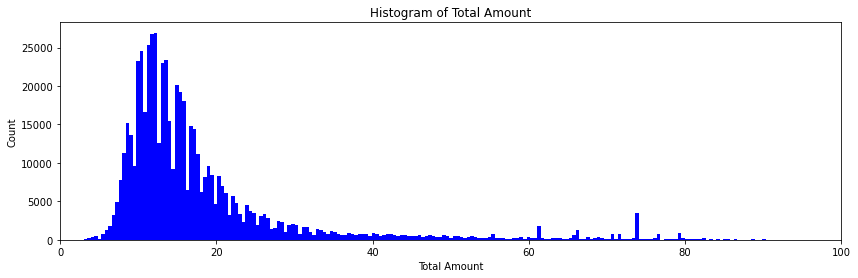

In [48]:
plt.figure(figsize=(14,4))
 
plt.hist(sample_train["total_amount"],1000,facecolor="blue")
plt.xlabel('Total Amount')
plt.ylabel('Count')
plt.title('Histogram of Total Amount')
plt.xlim(0,100);


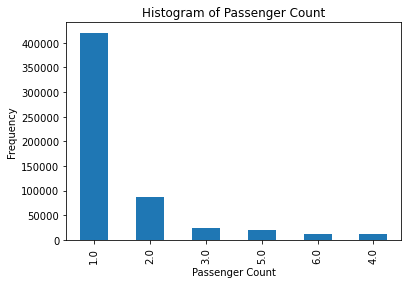

In [49]:
sample_train['passenger_count'].value_counts().plot.bar()
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency');

In [52]:
sample_train['passenger_count'].value_counts()

1.0    420467
2.0     87348
3.0     23174
5.0     20759
6.0     12189
4.0     11472
Name: passenger_count, dtype: int64

In [145]:
sample_val['passenger_count'].value_counts()

1.0    139864
2.0     29210
3.0      7825
5.0      6932
6.0      4203
4.0      3768
7.0         1
Name: passenger_count, dtype: int64

In [57]:
import folium

In [118]:
#nyc = folium.Map(location=[40.730610, -73.935242],zoom_start=12)

In [119]:
#nyc

In [120]:
#for i in sample_train.index[:100]:
#    folium.CircleMarker(location=[sample_train['PULocationID'][i],sample_train['DOLocationID'][i]], color='green').add_to(nyc)

In [121]:
#nyc

The most visited area is : [236]


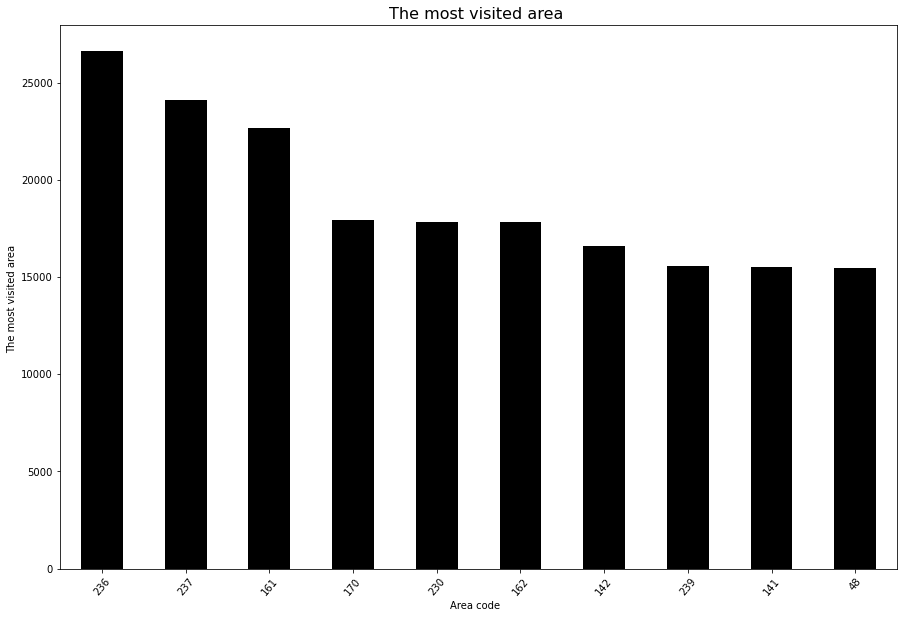

In [68]:
#Q1 :    ماهو المكان الأثر زيارة
n = 1
most_famous_Location= sample_train['DOLocationID'].value_counts()[:n].index.tolist()
print('The most visited area is :',most_famous_Location)
# visulatiziton Q1 :
m=10
plt.figure(figsize=(15,10))
sample_train['DOLocationID'].value_counts()[:m].plot.bar(color ='black')
plt.xticks(rotation=50)
plt.xlabel("Area code  ")
plt.ylabel("The most visited area ")
plt.title('The most visited area ', fontsize=16)
plt.show();


The most requested day for trips is : [4]


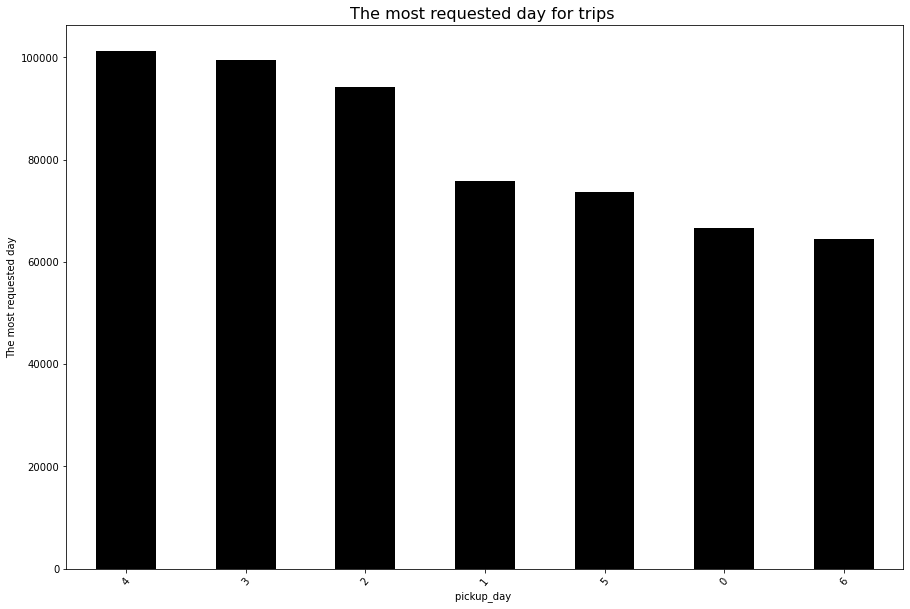

In [69]:
# Q2 ماهو اليوم الأكثر طلب للرحلات ؟
n=1
most_requested_day= sample_train['pickup_day_no'].value_counts()[:n].index.tolist()
print('The most requested day for trips is :',most_requested_day)
# visulatiziton Q2 :
plt.figure(figsize=(15,10))
sample_train['pickup_day_no'].value_counts().plot.bar(color ='black')
plt.xticks(rotation=50)
plt.xlabel("pickup_day ")
plt.ylabel("The most requested day")
plt.title('The most requested day for trips ', fontsize=16)
plt.show();


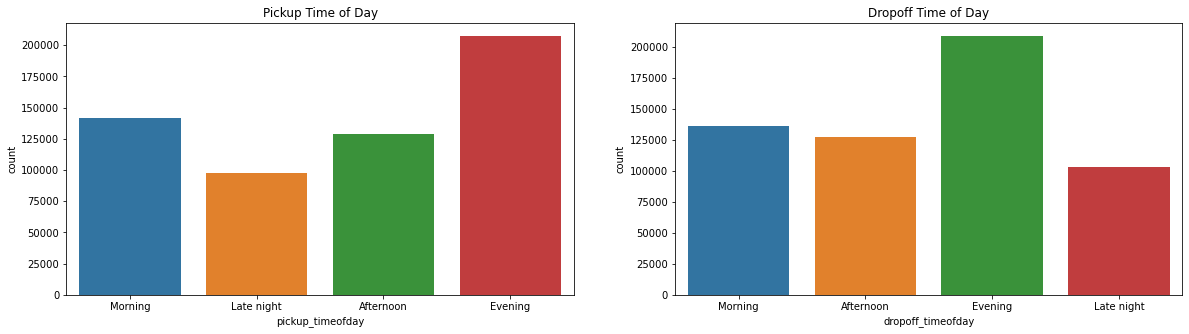

In [70]:
# Q3 :  ماهو الوقت الأكثر طلب للرحلات ؟ 
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=sample_train,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=sample_train,ax=ax4)
#visulatiziton Q3


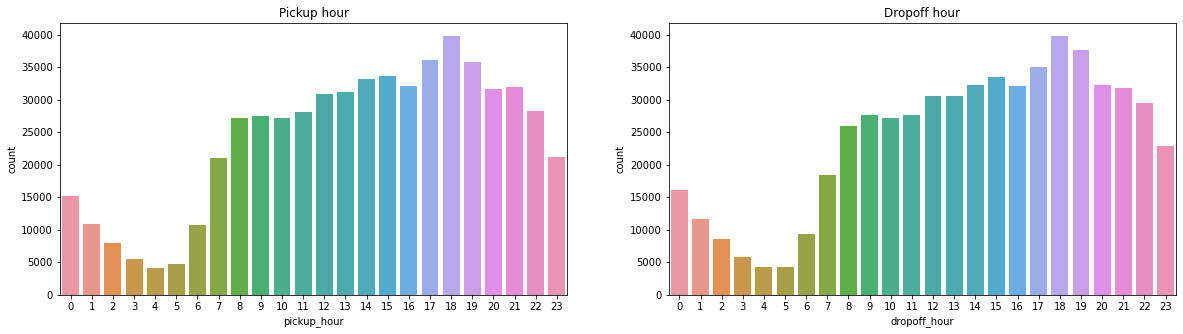

In [71]:
# Q4:                                                                                         كم عدد الرحلات في الساعة الوحده  ؟     
# visulatiziton Q4
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup hour')
ax=sns.countplot(x="pickup_hour",data=sample_train,ax=ax9)
ax10.set_title('Dropoff hour')
ax=sns.countplot(x="dropoff_hour",data=sample_train,ax=ax10)


The Most used payment method is : [1.0, 2.0, 3.0, 4.0]


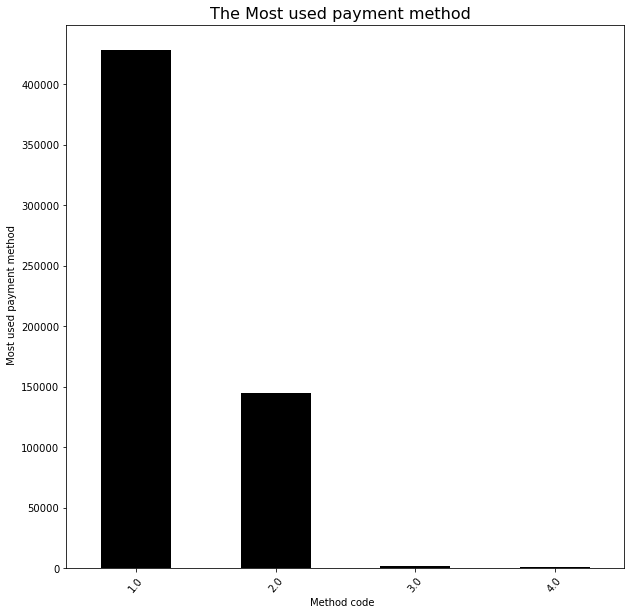

In [72]:

# Q5 : أكثر طريقة دفع مستخدمة؟ 
n=4.0
#ML_data=ML_data.sample() # هنا يوم كنت اشتغل على اداتا كاملة كان يطلع لي ايرور
Most_payment_method= sample_train['payment_type'].value_counts()[:n].index.tolist()
print('The Most used payment method is :',Most_payment_method)
plt.figure(figsize=(10,10))
sample_train['payment_type'].value_counts().plot.bar(color ='black')
plt.xticks(rotation=50)
plt.xlabel("Method code  ")
plt.ylabel(" Most used payment method")
plt.title('The Most used payment method  ', fontsize=16)
plt.show();


In [77]:
# نسخة سويتها حتياط في حال احتجت اسوي رسمات 
sample_train2= sample_train.copy()

correletion 

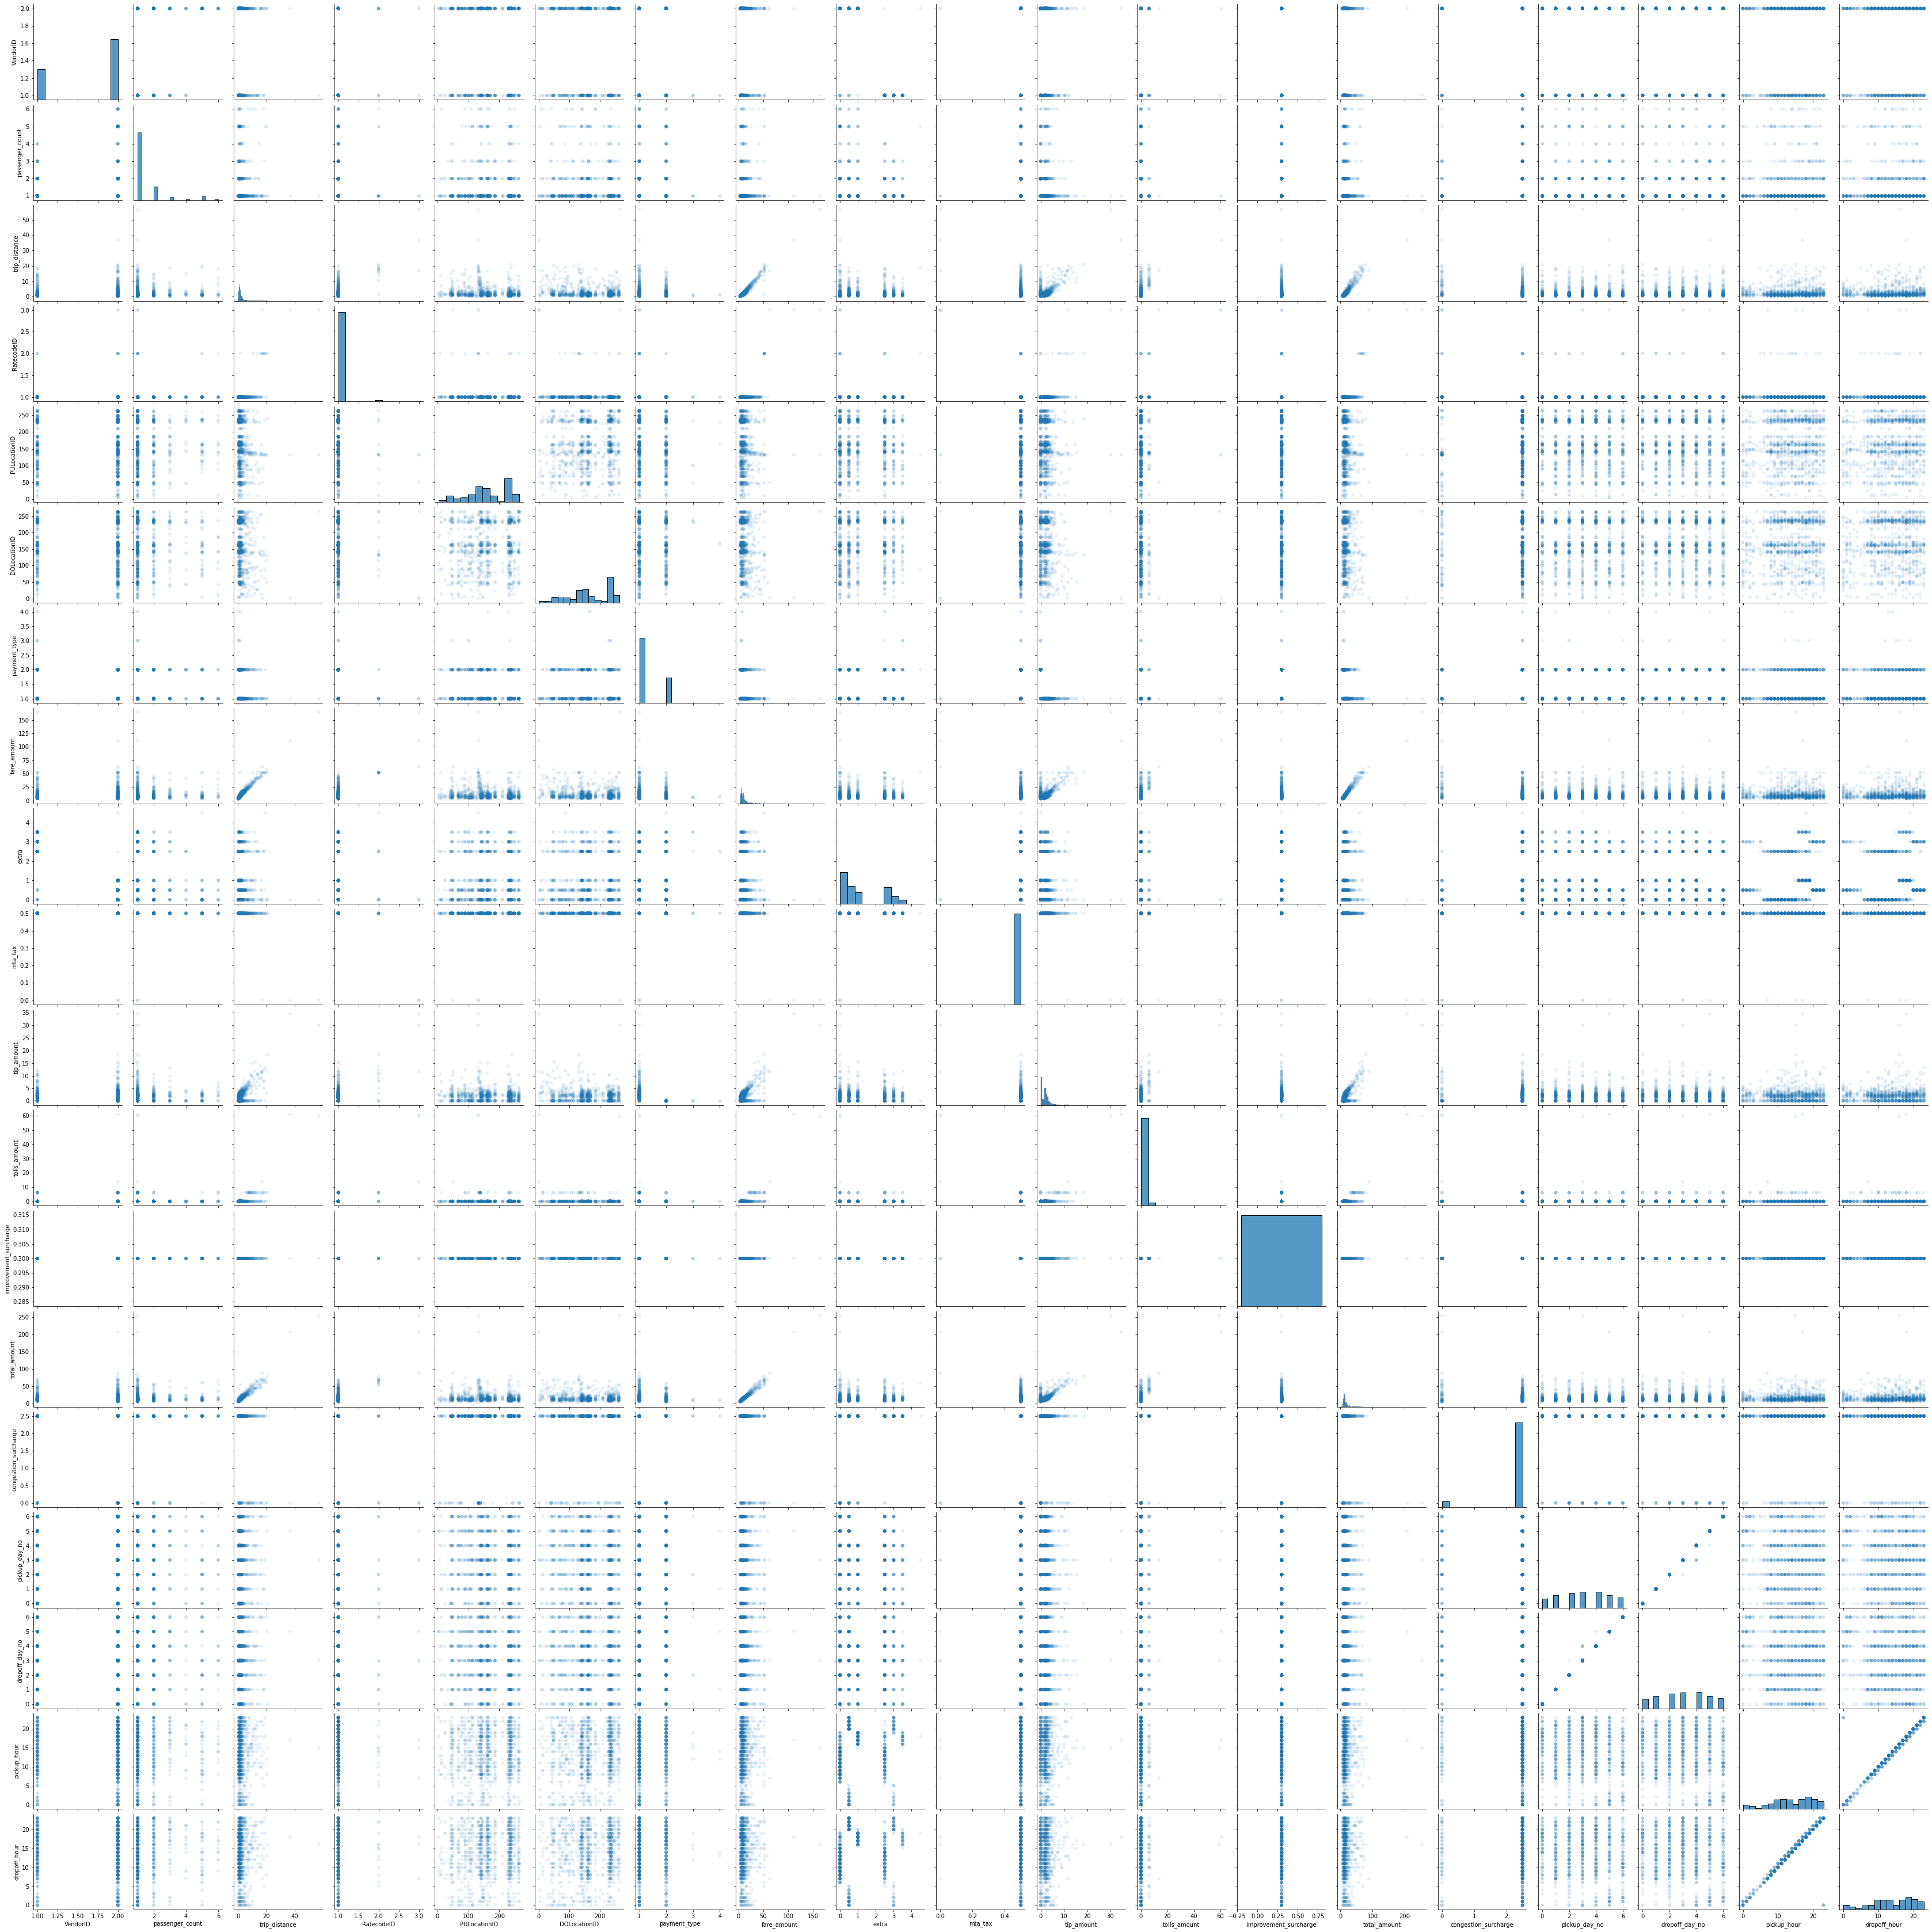

In [79]:
sns.pairplot(sample_train[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

<AxesSubplot:>

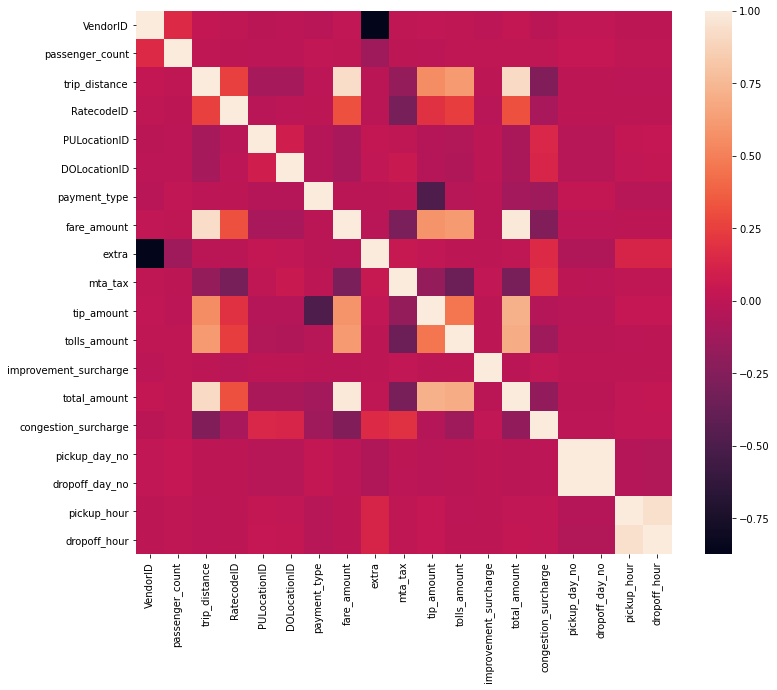

In [117]:
plt.figure(figsize=(12, 10))
sns.heatmap(sample_train.corr())

In [86]:
df_num_corr = sample_train.corr()['total_amount'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with SalePrice:
total_amount     1.000000
fare_amount      0.978713
trip_distance    0.919279
tip_amount       0.715777
tolls_amount     0.697010
Name: total_amount, dtype: float64


x,y >> sample_train 

In [103]:
x=sample_train[['fare_amount', 'trip_distance', 'tip_amount','tolls_amount']]

In [105]:
X_train,y_train = x, sample_train['total_amount']

In [106]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

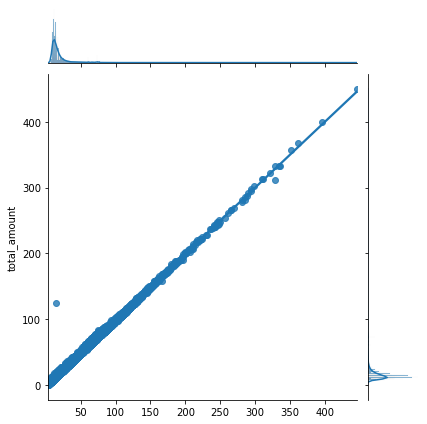

In [114]:
preds = lr_model.predict(X_train) 
sns.jointplot(x=preds,y=y_train, kind='reg')

In [115]:
lr_model.score(X_train,y_train)

0.996683233515405

xx,yy >> sample_val 

In [146]:
xx=sample_val[['fare_amount', 'trip_distance', 'tip_amount','tolls_amount']]

In [147]:
X_val,y_val = xx, sample_val['total_amount']

In [148]:
lr_model.score(X_val,y_val)

0.9968319345847172

In [ ]:
sns.set(style="darkgrid", font_scale=1)
fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(10, 4)

plt.tight_layout()

sns.histplot(df["passenger_count"],ax=ax1,bins=15)
ax1.set_xlabel('passenger_count')

sns.histplot(df["total_amount"],ax=ax2,bins=15)
ax2.set_xlabel('total_amount')

sns.histplot(df["PULocationID"],ax=ax3,bins=15)
ax3.set_xlabel('PULocationID')

sns.histplot(df["DOLocationID"],ax=ax4,bins=15)
ax4.set_xlabel('DOLocationID')
#binwidth=2
#bins

fig.subplots_adjust(wspace = 0.5)
plt.suptitle('Distribution ',fontweight="bold",fontsize = 15,y=1.05)    
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)       
plt.tight_layout()
df.boxplot()
plt.show()